In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load user_signup_data file as a pandas dataFrame

df = pd.read_csv('n26_v1.csv',index_col=0)

In [12]:
# Check the first rows of user_signup_data file 

df.head(1)

,cpc,organic,affiliate,social,signup_date,total
0,1,0,0,1,2017-02-01,2


In [4]:
df.drop(['userid','campaign'] , axis=1 , inplace = True)

In [5]:
df.head(1)

,cpc,organic,affiliate,social,signup_date
0,1,0,0,1,2017-02-01


In [6]:
df.corr()

,cpc,organic,affiliate,social
cpc,1.000000,-0.001533,-0.567837,-0.175666
organic,-0.001533,1.000000,-0.378763,-0.094708
affiliate,-0.567837,-0.378763,1.000000,-0.011317
social,-0.175666,-0.094708,-0.011317,1.000000


In [8]:
# Create a new column named "total" which will be the sum of the different channels

df['total'] = df['cpc'] + df['organic'] + df['affiliate'] + df['social']
df.head()

,cpc,organic,affiliate,social,signup_date,total
0,1,0,0,1,2017-02-01,2
1,1,0,1,0,2017-01-10,2
2,0,0,1,1,2017-03-24,2
3,1,0,0,0,2017-03-06,1
4,1,0,0,0,2017-03-03,1


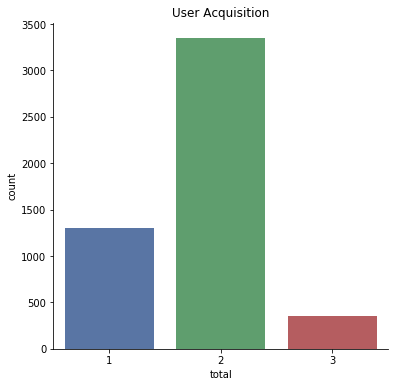

In [50]:
# countplot  of the different number of channels required to acquire a user. 

plt.figure(figsize=(6,6))
plt.title('User Acquisition')
sns.countplot(x=df['total'],data=df,palette='deep')
sns.despine()

In [10]:
# Statistical description of the multi channels

df['total'].describe()

count    5000.00000
mean        1.81180
std         0.54336
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         3.00000
Name: total, dtype: float64

In [52]:
# Count of the different channels

df['total'].value_counts()

2    3347
1    1297
3     356
Name: total, dtype: int64

Data exploration to try to find more relations between the different channels.

In [13]:
df2 = df[df['total']==2]

In [14]:
df2.columns

Index(['cpc', 'organic', 'affiliate', 'social', 'signup_date', 'total'], dtype='object')

In [37]:
df_aff_soc = df[(df['cpc'] == 0) & (df['organic']==0)& (df['social']==1) & (df['affiliate']==1) ].groupby('signup_date').count()

In [39]:
df_aff_soc['total'].describe()

count    91.000000
mean     22.120879
std       4.302028
min      13.000000
25%      19.000000
50%      22.000000
75%      24.000000
max      34.000000
Name: total, dtype: float64

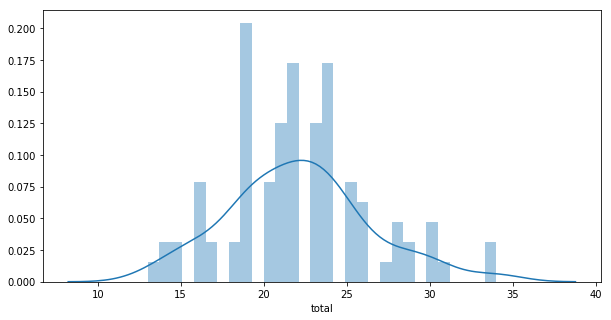

In [40]:
# Plot of a distribution viz of the affiliate + social channel

plt.figure(figsize=(10,5))
sns.distplot(df_aff_soc['total'], bins =30)

In [33]:
df_affiliate = df[(df['cpc'] == 0) & (df['organic']==0)& (df['social']==0) & (df['affiliate']==1)].groupby('signup_date').count()

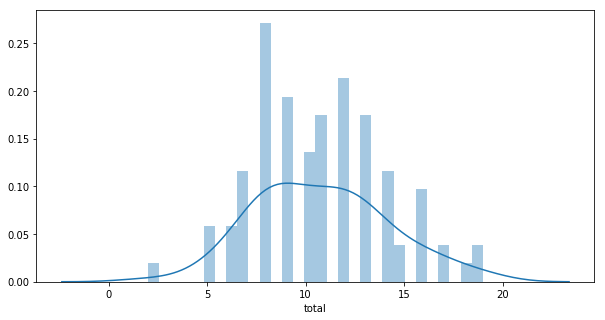

In [34]:
# Plot of a distribution viz of the affiliate channel

plt.figure(figsize=(10,5))
sns.distplot(df_affiliate['total'], bins =30)

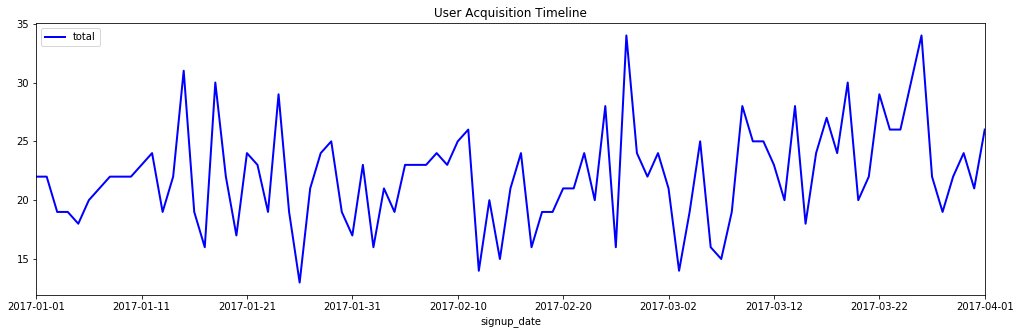

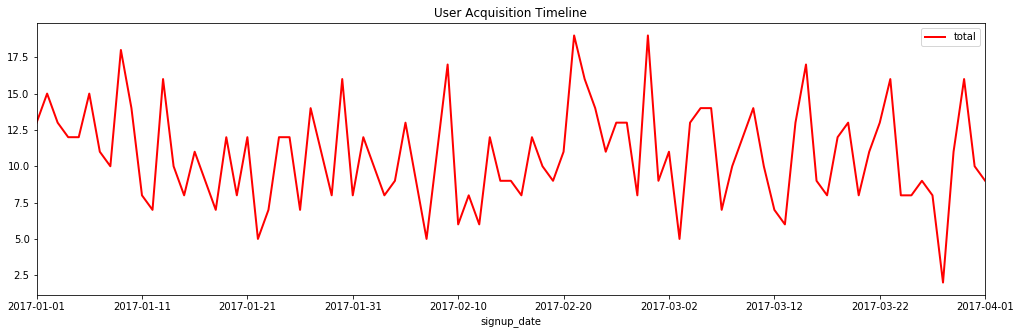

In [45]:
# Visualization of user acquisition over time

df_aff_soc.plot.line(x=df_aff_soc.index,y='total',figsize=(17,5),lw=2, color='b' , title = 'User Acquisition Timeline')
df_affiliate.plot.line(x=df_affiliate.index,y='total',figsize=(17,5),lw=2, color='r' , title = 'User Acquisition Timeline')